#  DSP LAB Experiment 5
Author: P. Ramyashri <br>
Email: pramyshri.191ee138@gmail.com <br>
Roll: 191EE138 <br>
Date: 13/10/2021<br>

GITHUB LINK:https://github.com/ramyashri1887/DSP-LAB 

In [5]:
#imports 
import numpy as np 
import matplotlib.pyplot as plt 
import IPython.display as ipd
import librosa 
import librosa.display
#libraries used 

## Problem 1. (Spectrogram of Chirp Signal)
 

In [24]:
#constructing a signal 
alpha=1+138%4 #3
fs=100 #sampling rate
t=np.arange(0,10,1/fs)
f= ((1.2)*t)+8 # f(t)= linearly increases from 8 to 20.
signal=np.sin(2*np.pi*f*t)
alpha

3

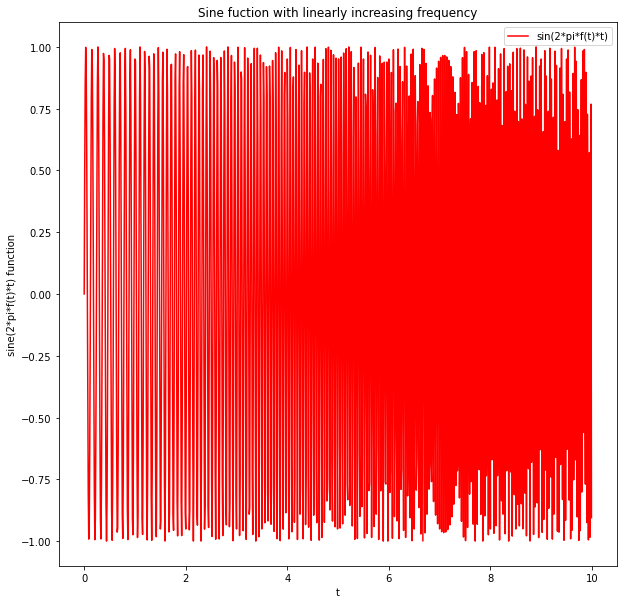

<Figure size 432x288 with 0 Axes>

In [7]:
#1. Plot the signal as a function of time.
fig, ax = plt.subplots(figsize=[10,10]) 
plt.figure()
ax.plot(t,signal,'r', label= 'sin(2*pi*f(t)*t)')
ax.set(title='Sine fuction with linearly increasing frequency', ylabel='sine(2*pi*f(t)*t) function',xlabel='t')
leg = ax.legend()

plt.show()


### Remarks
Sine wave with increasing frequency from 8Hz to 20Hz

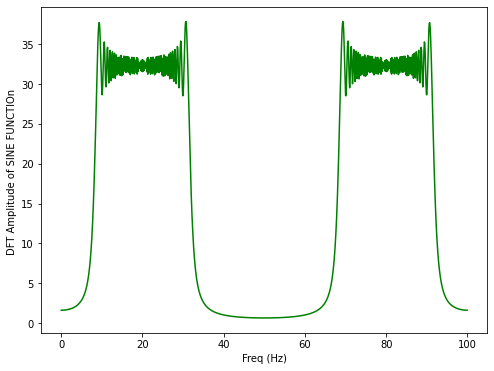

In [21]:
#2. In a separate figure, plot the frequency spectrum of the signal using FFT. 
#Can you identify the frequency components of the signal?

#tried hardcoding 
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

X1= DFT(signal)

# calculate the frequency
N1 = len(X1)
n1 = np.arange(N1)
T1 = N1/fs
freq1 = n1/T1 

plt.figure(figsize = (8, 6))
plt.plot(freq1, abs(X1), 'g')
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude of SINE FUNCTIOn ')
plt.show()


### Remarks
Spectrum: All frequencies from 8 to 20 observed , and a symmetric graph from 20 to 32. <br>
Function is real and odd , so DFT is imaginary and odd. but since we take the absolute value. 

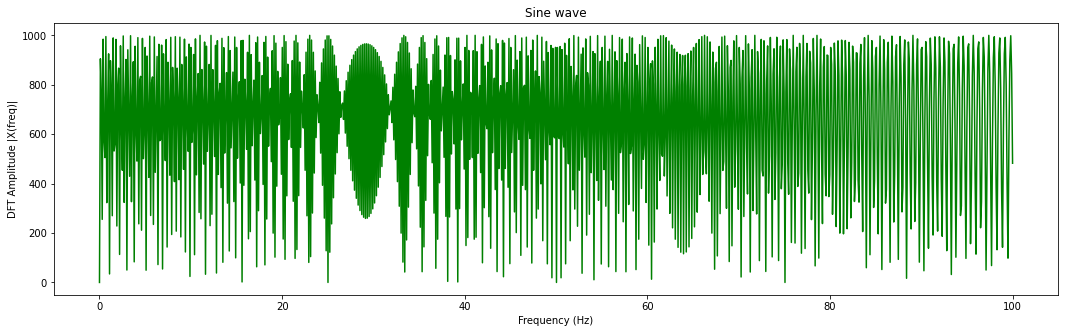

In [23]:
#2. In a separate figure, plot the frequency spectrum of the signal using FFT. 
#Can you identify the frequency components of the signal?
X = np.fft.fft(signal)

def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    
    plt.plot(f[:f_bins], X_mag[:f_bins],'g')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('DFT Amplitude |X(freq)|')
    plt.title(title)

plot_magnitude_spectrum(X, fs, "Sine wave", 1)

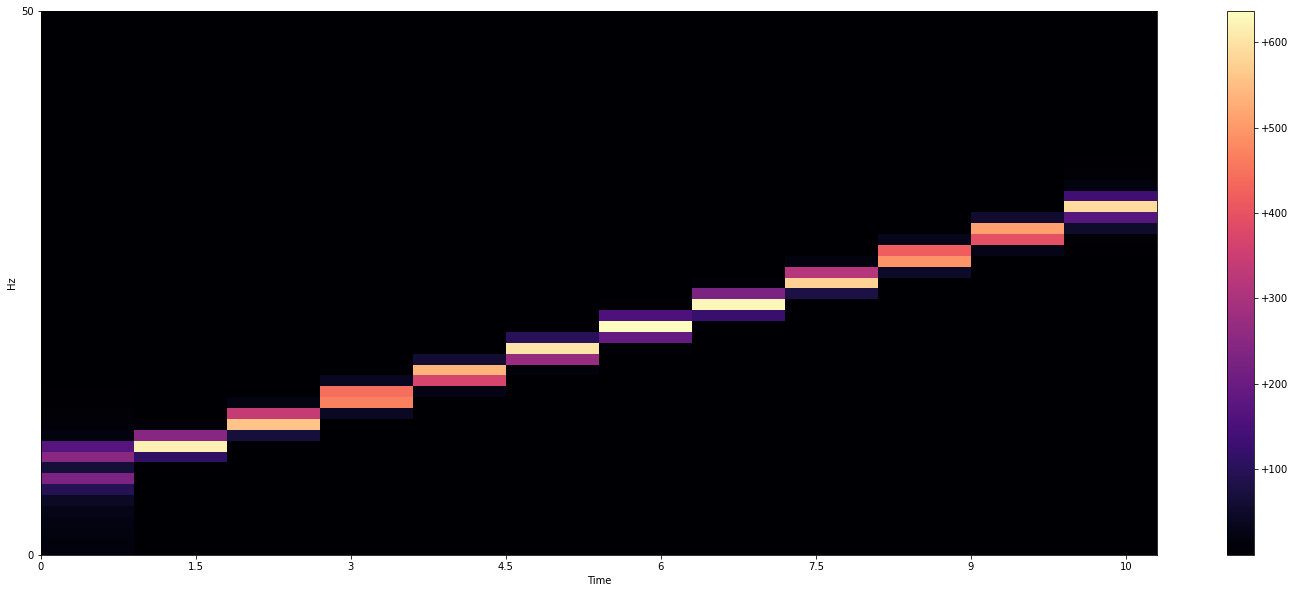

In [26]:
#3. Now use the same signal and plot a spectrogram of the signal in a separate plot.
#Use a hamming window length of 100 samples and an overlap of 10 samples.

#spectrogram plot definition 
def plot_spectogram(data,sr,hop_length, y_axis="log"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(data,y_axis=y_axis,x_axis="time",hop_length=hop_length, sr=sr)
    plt.colorbar(format="%+2.f")

FRAME_SIZE=100 #powers of two , for reasons like spectral leakage 
HOP_SIZE=90 #same , powers of 2
x=librosa.stft(signal,n_fft=FRAME_SIZE,hop_length=HOP_SIZE, window="hamming")
#finding the abs value to plot a spectogram 
x_spec= abs(x)**2
#converting to log scale, for begtre visualisation 

#x_log_spec=librosa.power_to_db(x_spec)
plot_spectogram(x_spec,fs,HOP_SIZE,y_axis="log")



### Spectrograms Vs Spectrums
Spectrograms are better than spectrums for analysing audio signals since they not just show us what the frequency components are, but also how they evolve over time

## Time frequency Tradeoff Observation by increasing the frame size
Observe that time resolution decreases in each subsequent graph.

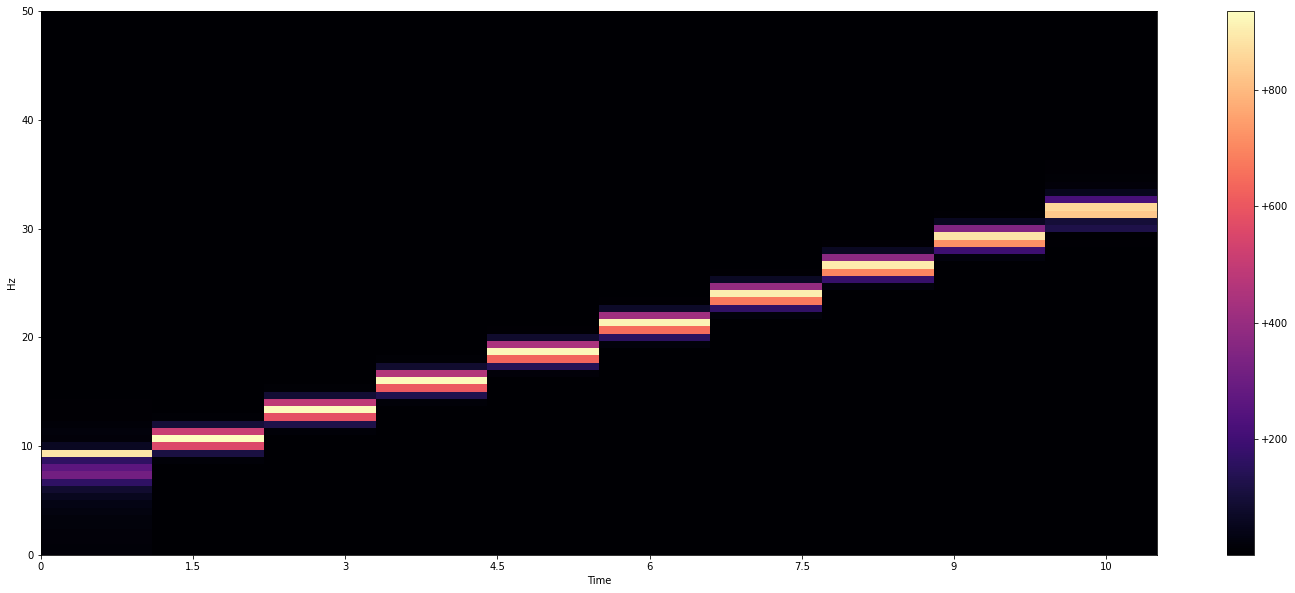

In [11]:
FRAME_SIZE=150 
HOP_SIZE=110 

X=librosa.stft(signal,n_fft=FRAME_SIZE,hop_length=HOP_SIZE, window="hamming")
#finding the abs value to plot a spectogram 
x_spec= abs(X)**2
#converting to log scale, for begtre visualisation 
#x_log_spec=librosa.power_to_db(x_spec)
plot_spectogram(x_spec,fs,HOP_SIZE,y_axis="linear")

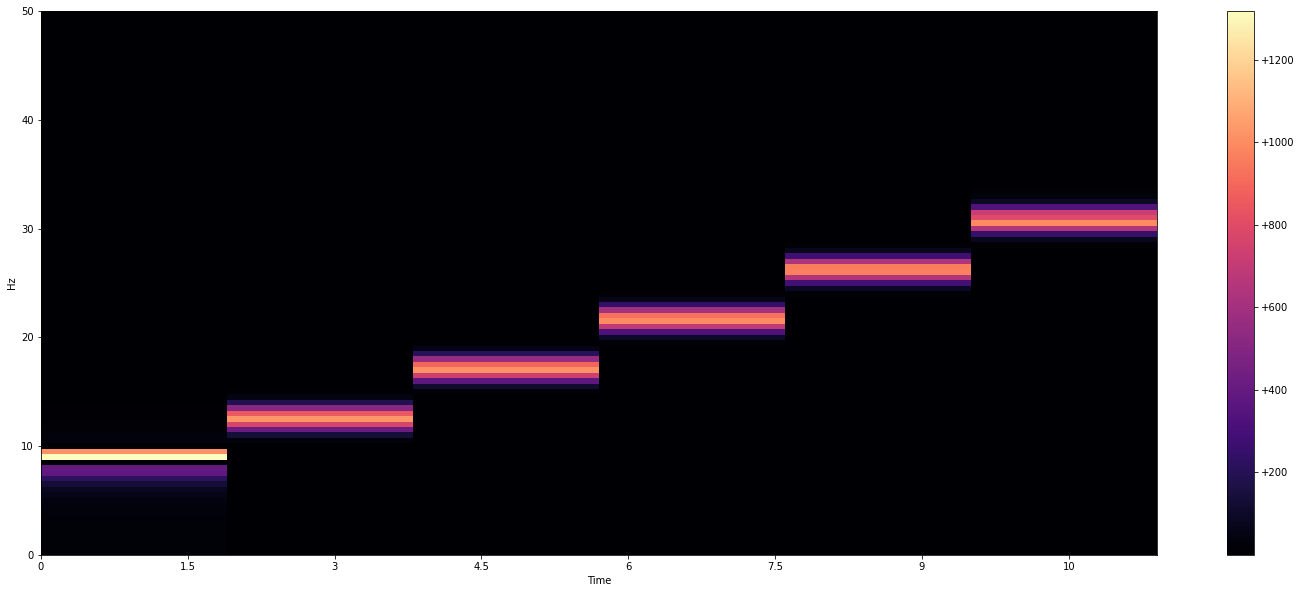

In [12]:
FRAME_SIZE=200 #powers of two , for reasons like spectral leakage 
HOP_SIZE=190 
X=librosa.stft(signal,n_fft=FRAME_SIZE,hop_length=HOP_SIZE, window="hamming")
#finding the abs value to plot a spectogram 
x_spec= abs(X)**2
#converting to log scale, for begtre visualisation 
x_log_spec=librosa.power_to_db(x_spec)
plot_spectogram(x_spec,fs,HOP_SIZE,y_axis="linear")

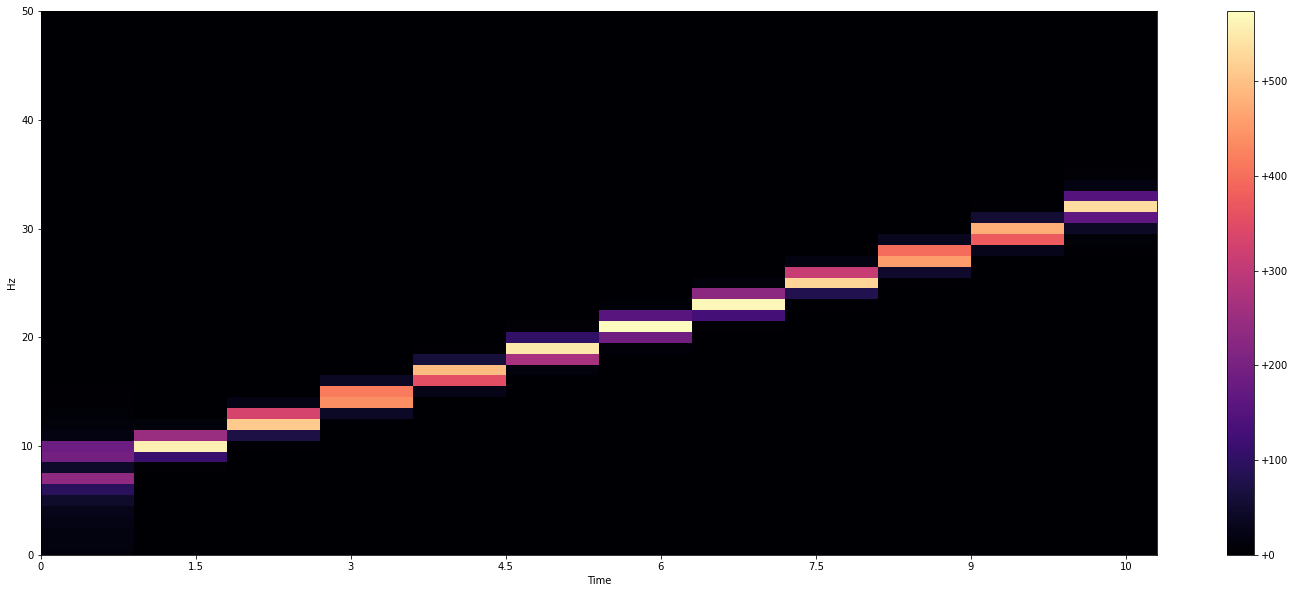

In [28]:
FRAME_SIZE=100 
HOP_SIZE=90 

X=librosa.stft(signal,n_fft=FRAME_SIZE,hop_length=HOP_SIZE, window="hann")
#finding the abs value to plot a spectogram 
x_spec= abs(X)**2
#converting to log scale, for begtre visualisation 
#x_log_spec=librosa.power_to_db(x_spec)
plot_spectogram(x_spec,fs,HOP_SIZE,y_axis="linear")

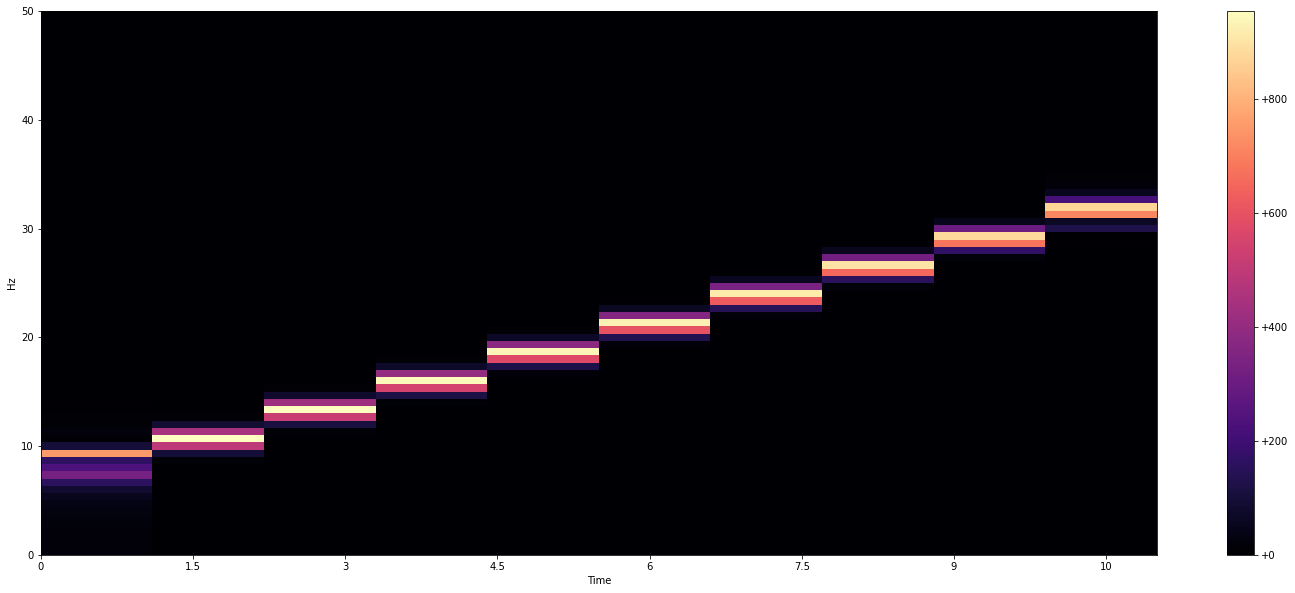

In [27]:
FRAME_SIZE=150 
HOP_SIZE=110 

X=librosa.stft(signal,n_fft=FRAME_SIZE,hop_length=HOP_SIZE, window="hann")
#finding the abs value to plot a spectogram 
x_spec= abs(X)**2
#converting to log scale, for begtre visualisation 
#x_log_spec=librosa.power_to_db(x_spec)
plot_spectogram(x_spec,fs,HOP_SIZE,y_axis="linear")

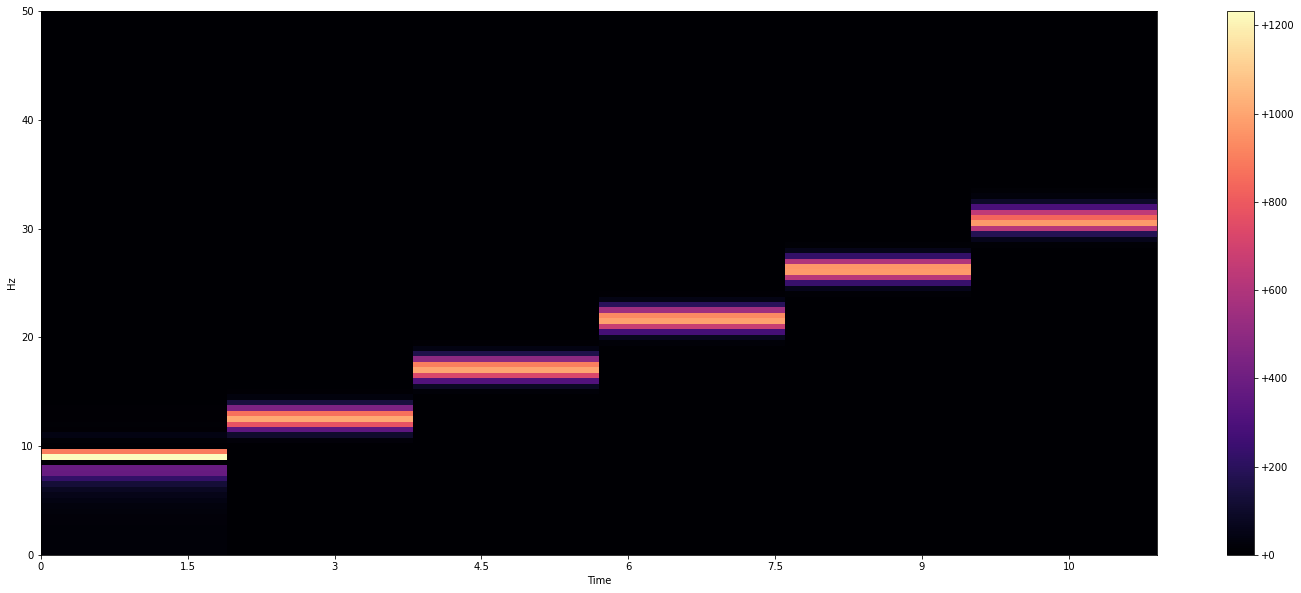

In [29]:
FRAME_SIZE=200 
HOP_SIZE=190 

X=librosa.stft(signal,n_fft=FRAME_SIZE,hop_length=HOP_SIZE, window="hann")
#finding the abs value to plot a spectogram 
x_spec= abs(X)**2
#converting to log scale, for begtre visualisation 
#x_log_spec=librosa.power_to_db(x_spec)
plot_spectogram(x_spec,fs,HOP_SIZE,y_axis="linear")

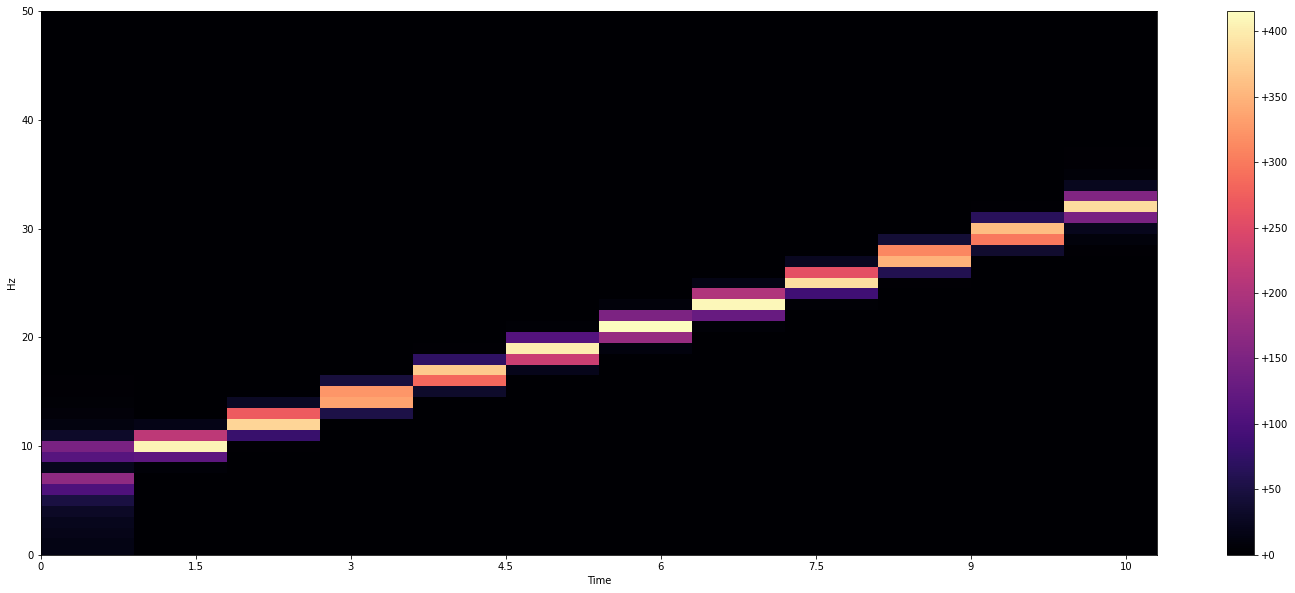

In [33]:
FRAME_SIZE=100 
HOP_SIZE=90 

X=librosa.stft(signal,n_fft=FRAME_SIZE,hop_length=HOP_SIZE, window="blackman")
#finding the abs value to plot a spectogram 
x_spec= abs(X)**2
#converting to log scale, for begtre visualisation 
#x_log_spec=librosa.power_to_db(x_spec)
plot_spectogram(x_spec,fs,HOP_SIZE,y_axis="linear")

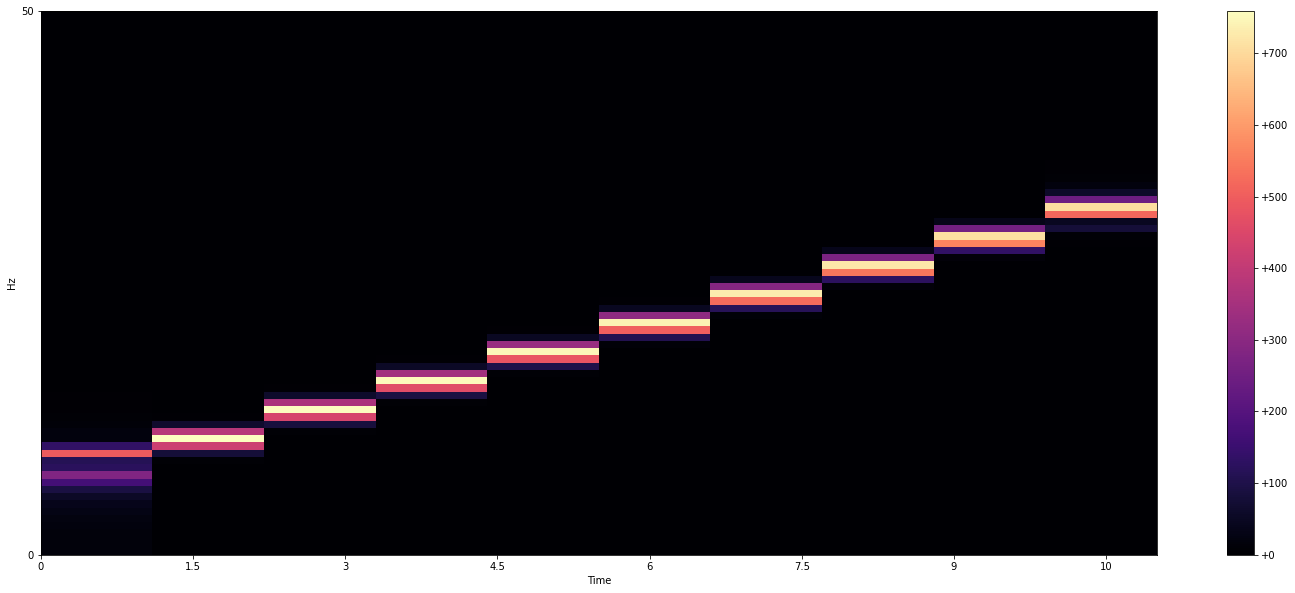

In [32]:
FRAME_SIZE=150 
HOP_SIZE=110 

X=librosa.stft(signal,n_fft=FRAME_SIZE,hop_length=HOP_SIZE, window="blackman")
#finding the abs value to plot a spectogram 
x_spec= abs(X)**2
#converting to log scale, for begtre visualisation 
#x_log_spec=librosa.power_to_db(x_spec)
plot_spectogram(x_spec,fs,HOP_SIZE,y_axis="log")

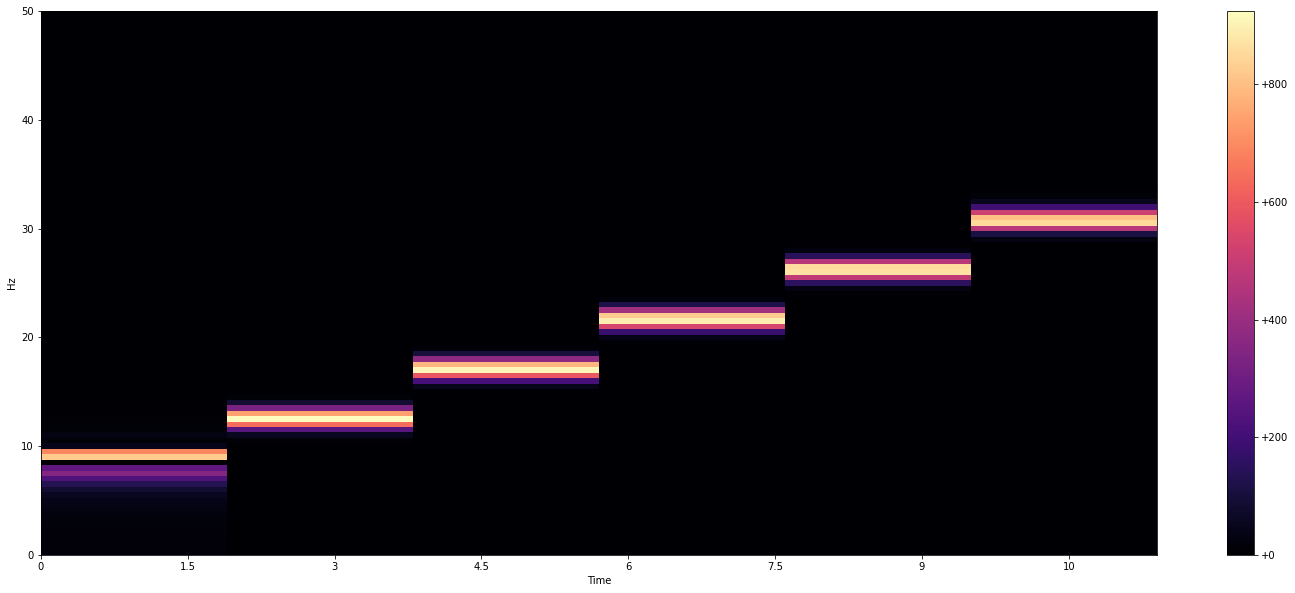

In [30]:
FRAME_SIZE=200 
HOP_SIZE=190 

X=librosa.stft(signal,n_fft=FRAME_SIZE,hop_length=HOP_SIZE, window="blackman")
#finding the abs value to plot a spectogram 
x_spec= abs(X)**2
#converting to log scale, for begtre visualisation 
#x_log_spec=librosa.power_to_db(x_spec)
plot_spectogram(x_spec,fs,HOP_SIZE,y_axis="linear")

## Remarks 

Increasing the frame size, decreases the time resolution , this is the time-frequency tradeoff.
<br>
With the increase in the frame size , you see that the width of time pixel has increased. which in turn means the time resolution is decreased.

# A comparison of different windowing techniques 

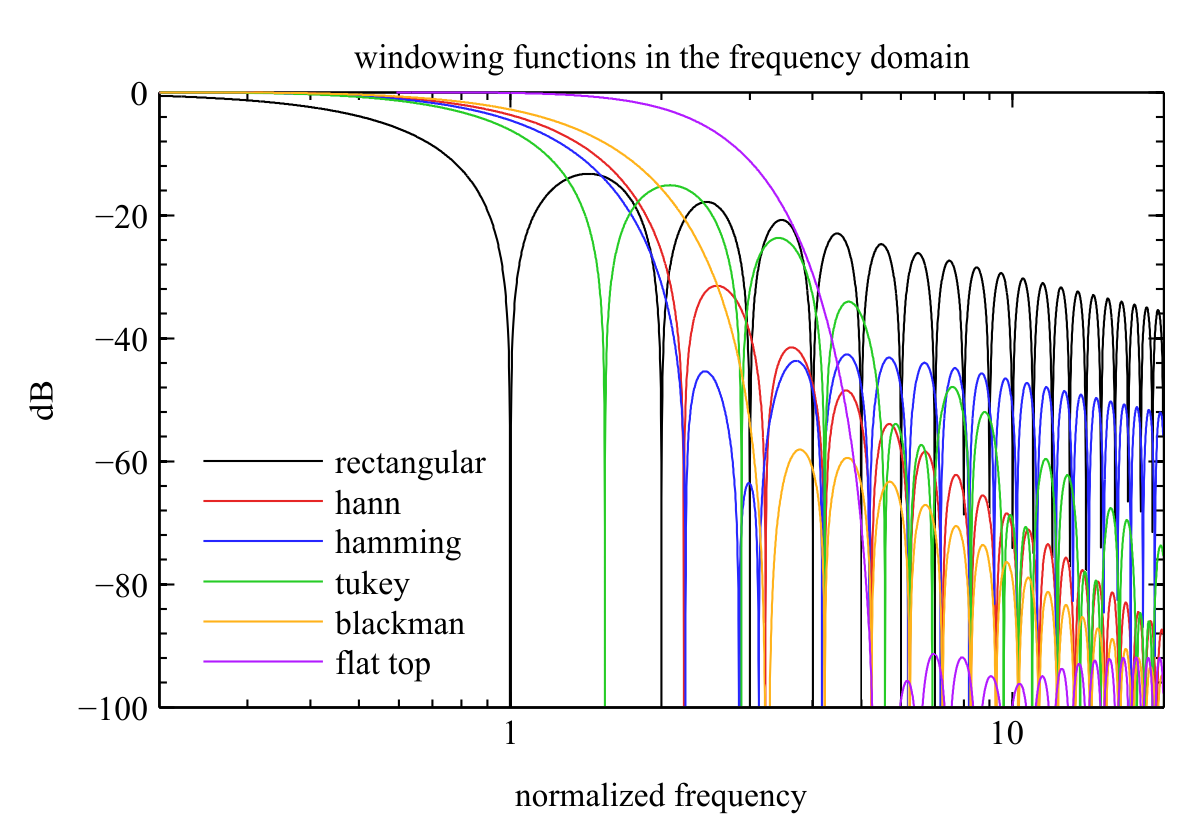

## Hanning window
- This is also known as a cosine taper.  
- It starts at 0, rises to 1 in the middle of the period, and then goes smoothly back down to zero at the end.
- w1(t) = 0.5  – 0.5 * cos(2pt/T)


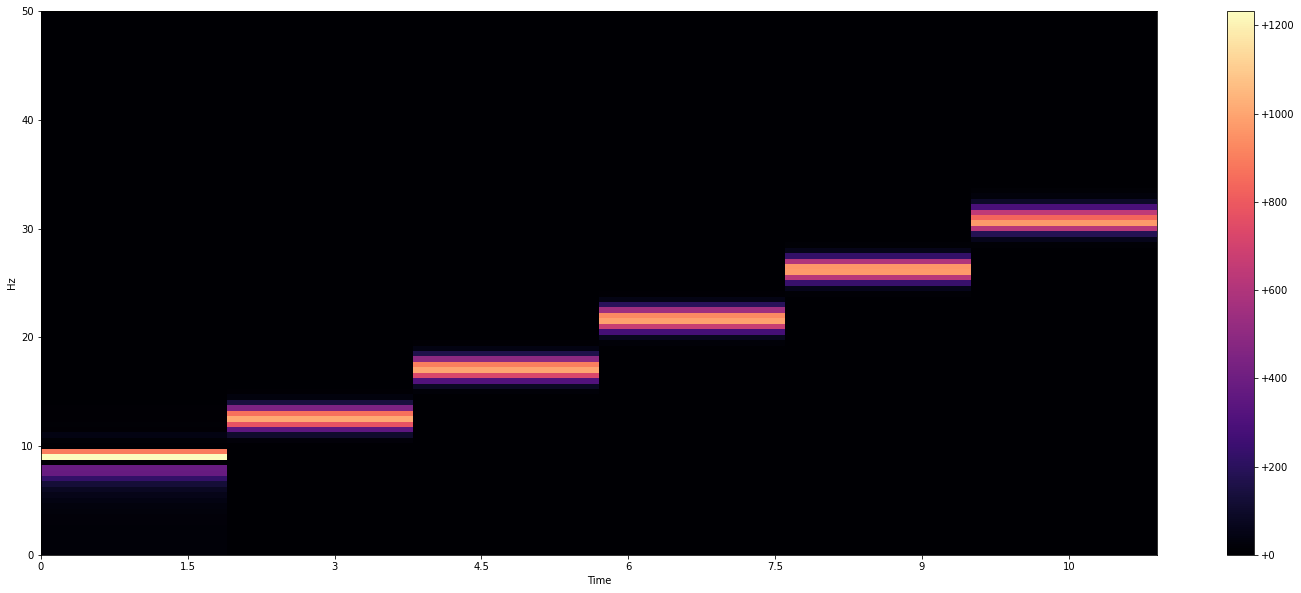

In [13]:
#hann window
FRAME_SIZE=200 
HOP_SIZE=190 #same , powers of 2

X=librosa.stft(signal,n_fft=FRAME_SIZE,hop_length=HOP_SIZE)
x_spec= abs(X)**2
#converting to log scale, for begtre visualisation 
x_log_spec=librosa.power_to_db(x_spec)

plot_spectogram(x_spec,fs,HOP_SIZE,y_axis="linear")


## Hamming window
- This modified cosine taper starts at 0.08, rises to 1 in the middle of the period, and then goes smoothly back down to 0.08 at the end.
- w2(t) = 0.54  – 0.46 * cos(2pt/T)

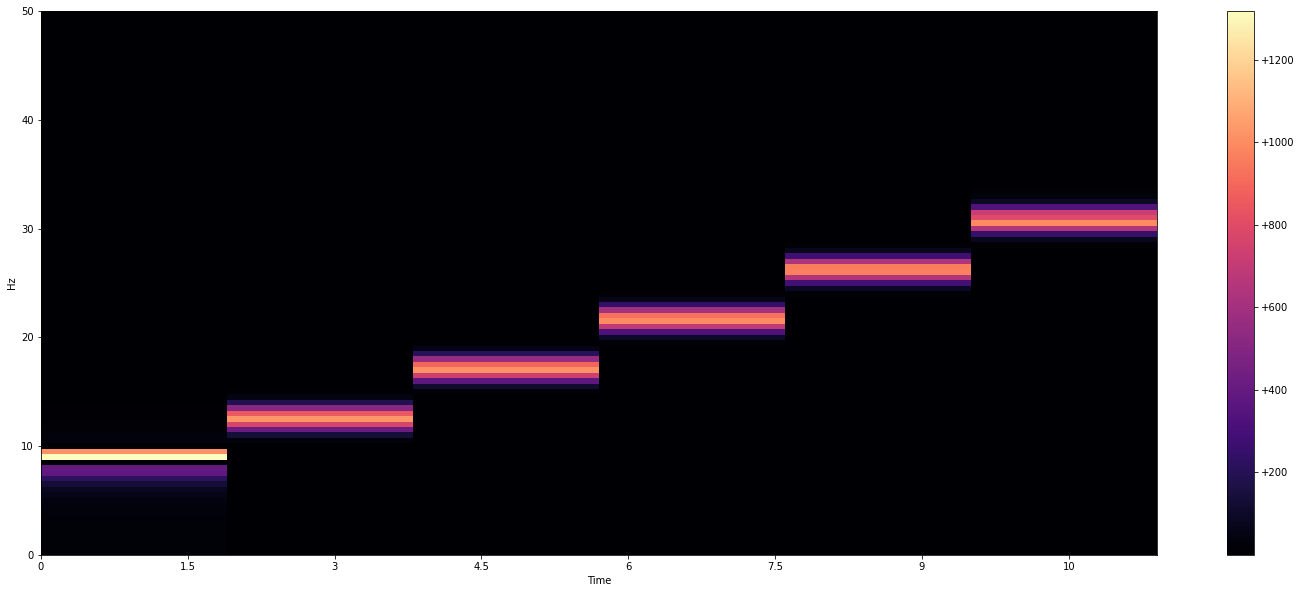

In [14]:
#hamming window
FRAME_SIZE=200 
HOP_SIZE=190 #same , powers of 2

X=librosa.stft(signal,n_fft=FRAME_SIZE,hop_length=HOP_SIZE,window="hamming")
x_spec= abs(X)**2
#converting to log scale, for begtre visualisation 
x_log_spec=librosa.power_to_db(x_spec)

plot_spectogram(x_spec,fs,HOP_SIZE,y_axis="linear")

## Blackman Window
- A cosine sum window
- The Blackman window has a wider main lobe and more side lobe attenuation than Hanning or Hamming<br>
ie spectral leakage is elimimnated at the cost of lower frequency resolution.

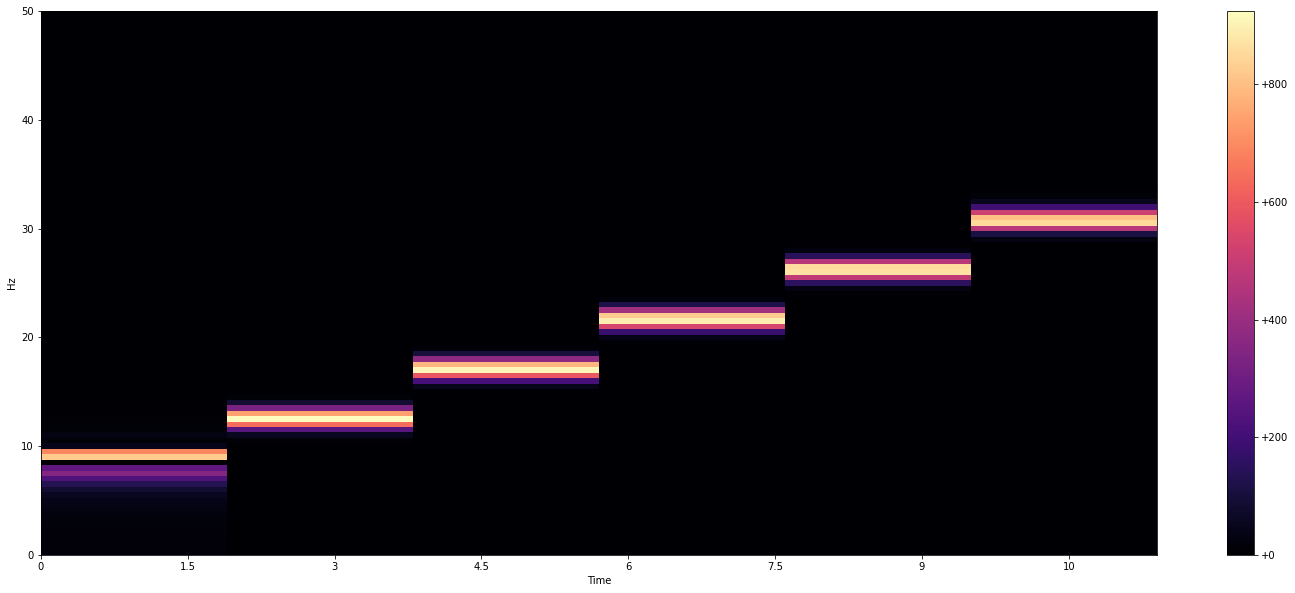

In [15]:
FRAME_SIZE=200 #powers of two , for reasons like spectral leakage 
HOP_SIZE=190 
X=librosa.stft(signal,n_fft=FRAME_SIZE,hop_length=HOP_SIZE,window="blackman")
x_spec= abs(X)**2
#converting to log scale, for begtre visualisation 
x_log_spec=librosa.power_to_db(x_spec)

plot_spectogram(x_spec,fs,HOP_SIZE,y_axis="linear")


### Remarks 

We observe that for blackman window,the color of the heatmap corresponds to 800 , and gets darker fast which means that the spectral leakage is low.<br>

whislt in hamming and hanning windows , the central color of the heatmap, is bright , which means sharper frequency resolution and also it does not rapidly turn purple, it gradually turns purple, means spectral leakage is not tacled efficiently.


## Problem 2. (Pitch Extraction)


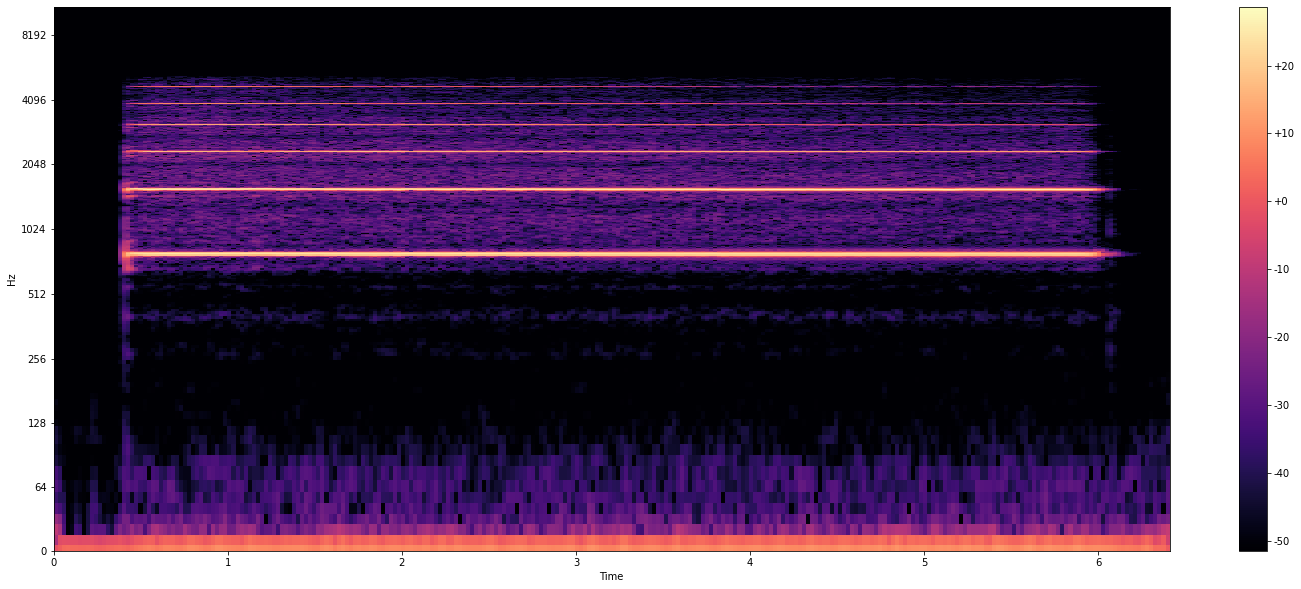

In [16]:
#1. Plot the spectrogram of the instruα.wav. 
#You may use any window of your choice and sample duration for the window. Can you now locate the fundamental pitch?

FRAME_SIZE=2048 #powers of two , for reasons like spectral leakage 
HOP_SIZE=512 #same , powers of 2
x,sr= librosa.load("instru3.wav")
x_scale=librosa.stft(x,n_fft=FRAME_SIZE,hop_length=HOP_SIZE)
#finding the abs value to plot a spectogram 
x_spec= abs(x_scale)**2
#spectogram plot definition 
def plot_spectogram(data,sr,hop_length, y_axis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(data,y_axis=y_axis,x_axis="time",hop_length=hop_length, sr=sr)
    plt.colorbar(format="%+2.f")
#converting to log scale, for beter visualisation 
x_log_spec=librosa.power_to_db(x_spec)
plot_spectogram(x_log_spec,sr,HOP_SIZE,y_axis="log")





### Remarks
Window used : Hann (Deafault window used in stft function)<br>
Sample duration for the window used : ie the frame size = 2048 <br>
Hop size chosen : 512<br>
Locating the funcdamental pitch : From the graph , the brightest streak is close to 1024, and is approx 0.6 of 512.<br>
819 Hz is the funcdamental pitch approximately.


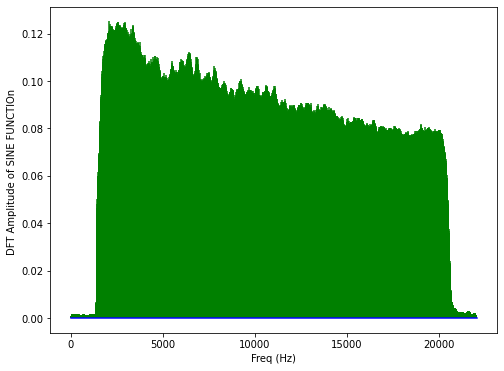

In [17]:
#Now plot the spectrum in the conventional way. Locate the fundamental pitch.
#Was our definition of the pitch correct in Experiment 3? Read upon the pitch of an instrument and discuss about it briefly in your report.
#Hardcoding DFT fucntion 
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

X1=x

# calculate the frequency
N1 = len(X1)
n1 = np.arange(N1)
T1 = N1/sr
freq1 = n1/T1 

plt.figure(figsize = (8, 6))
plt.stem(freq1, abs(X1), 'g', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude of SINE FUNCTIOn ')
plt.show()



### Remarks
Was our definition of the pitch correct in experiment 3?<br>
<b>Pitch of an Instrument</b>

What is the pitch of an instrument?
Pitch, in music, is position of a single sound in the complete range of sound. Sounds are higher or lower in pitch according to the frequency of vibration of the sound waves producing them. 

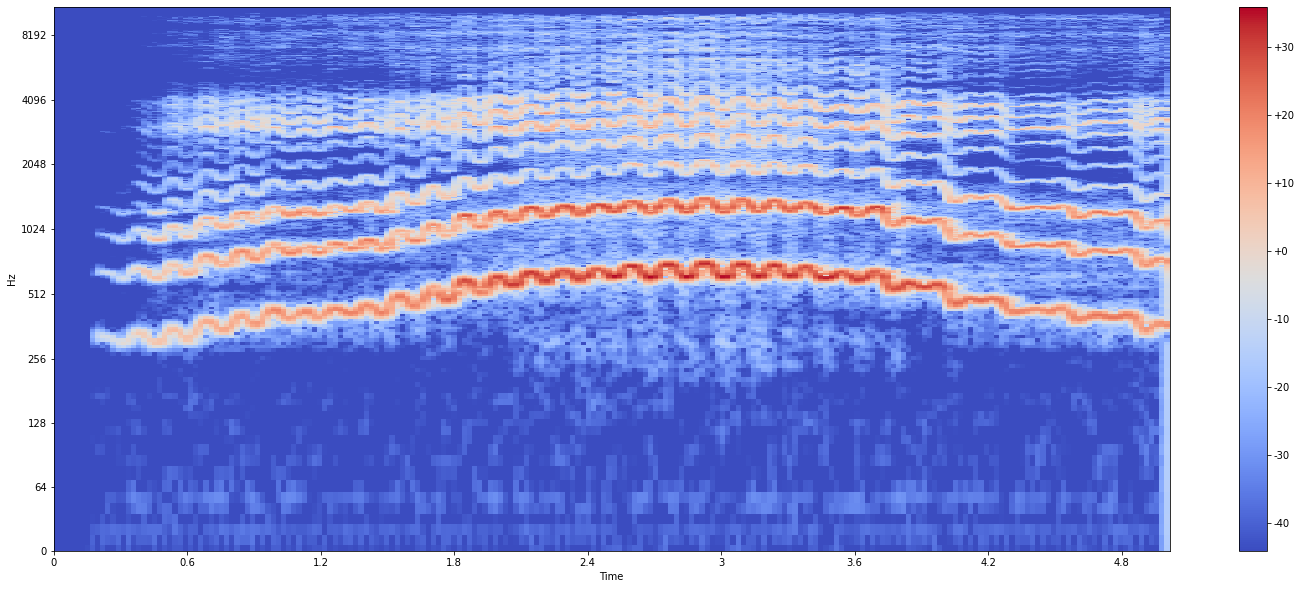

In [18]:
# 2. Plot the spectrogram of the opera.wav.
#Are you able to now track the variations in the fundamental pitch better compared to Experiment 3? Comment on it.

FRAME_SIZE=2048 
HOP_SIZE=512 
x,sr= librosa.load("opera.wav")
x_scale=librosa.stft(x,n_fft=FRAME_SIZE,hop_length=HOP_SIZE)
#finding the abs value to plot a spectogram 
x_spec= abs(x_scale)**2
#spectogram plot definition 
def plot_spectogram(data,sr,hop_length, y_axis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(data,y_axis=y_axis,x_axis="time",hop_length=hop_length, sr=sr)
    plt.colorbar(format="%+2.f")
#converting to log scale, for begtre visualisation 
x_log_spec=librosa.power_to_db(x_spec)
plot_spectogram(x_log_spec,sr,HOP_SIZE,y_axis="log")


### Remarks 
Variations in the funcdamental pitch , is clearly observed.<br>
This is clearly better than obsserving 100 different still  images. As one image , shows us how freqeuncy evolves over time as opposed to multiple images for each chunk as we did in exp 3.<br>
The first harmonic is observed close to 256 Hz.<br>
The higher red streaks above the first one  following the first frequency profile are the higher harmonics of the signal.<br>


## Problem 3. (Spectro-Temporal Analysis of Speech)
Record saying your name (preferably .wav file with a lower sampling rate, say 4000 Hz.
Plot the spectrogram and analyse the plot. Try to map location of the phoneme to the
spectrogram.

In [19]:
ipd.Audio("Ramya.wav")

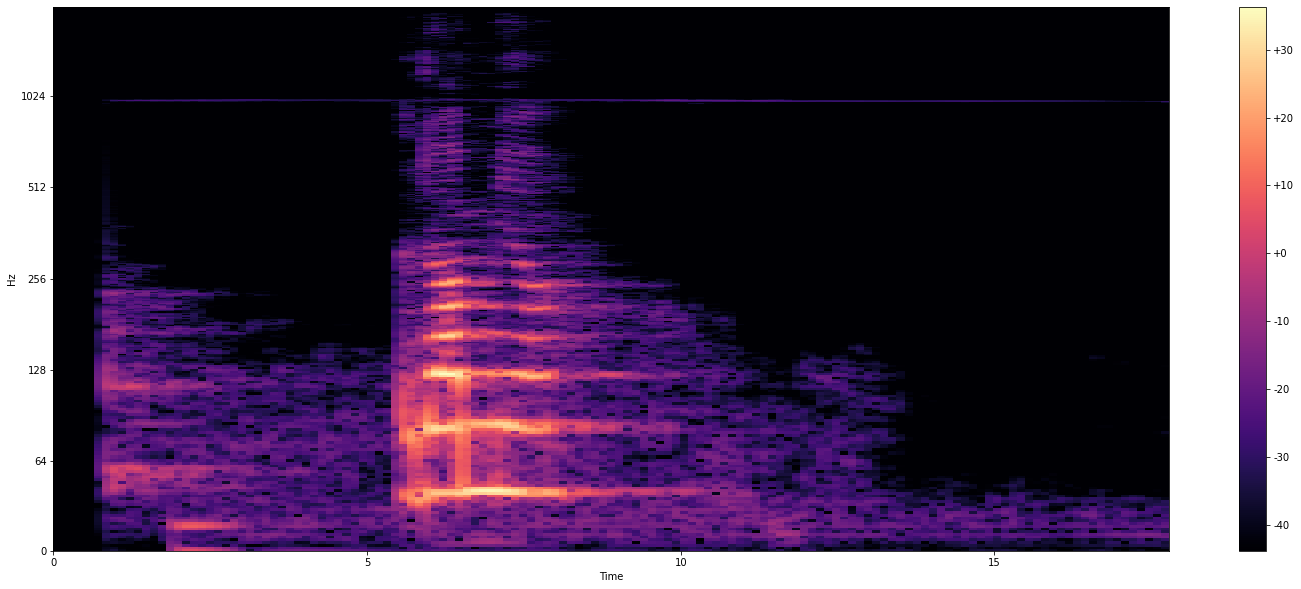

In [20]:
FRAME_SIZE=2048 #powers of two , for reasons like spectral leakage 
HOP_SIZE=512 #same , powers of 2
x,sr= librosa.load("Ramya.wav")
x_scale=librosa.stft(x,n_fft=FRAME_SIZE,hop_length=HOP_SIZE)
#finding the abs value to plot a spectogram 
x_spec= abs(x_scale)**2
#spectogram plot definition 
def plot_spectogram(data,sr,hop_length, y_axis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(data,y_axis=y_axis,x_axis="time",hop_length=hop_length, sr=sr)
    plt.colorbar(format="%+2.f")
#converting to log scale, for better visualisation 
x_log_spec=librosa.power_to_db(x_spec)
plot_spectogram(x_log_spec,4000,HOP_SIZE,y_axis="log")

### Plot analysation 
- Lower sampling rate for it to lie in the range that humans can sense.
- Spectrogram is heatmap, with frequency on y axis, time on x axis and amplitude as colored value.
- High energy streaks at: Fundamental frequency at 32 Hz. Other harmonics with similar frequency profile observed.
<br>
Pheneme of the spectrogram: RED streaks visible across temporal range 5 to 10.